# **DL: FCN of Pima-Indians-Diabetes-Data** 

> https://medium.com/@soumen.atta/analyzing-pima-indians-diabetes-data-using-python-89a021b5f4eb


In [ ]:
# Load the required packages 
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
%matplotlib inline

tf.random.set_seed(0)

print(tf.__version__)

2.3.0


**Load CSV file using Pandas**

In [ ]:
# Specify the file name 
url = "https://github.com/Redwoods/Py/raw/master/pdm2020/my-note/py-pandas/data/diabetes.csv"
filename = url
# filename = 'diabetes.csv'  # access to local file

# Read the data 
data = read_csv(filename) 

# Print the shape 
data.shape

(768, 9)

In [ ]:
# Print the first 5 rows 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# import TF2 submodules
from tensorflow.keras import layers, models, callbacks
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# Split dataset to train & test set
X_train = data.iloc[:600,0:8] # 600명
y_train = data.iloc[:600,8] # 마지막 outcom class니까 features 제외
X_test = data.iloc[600:,0:8]  # 168명
y_test = data.iloc[600:,8]
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((600, 8), (600,), (168, 8), (168,))

In [ ]:
# define the keras model -> FCN이 3층
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # softmaX 'sigmoid'-> output 마지막에 들어가는 값을 처리해서 0과 1사이의 확률값으로 출력함
# compile the keras model
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
hist = model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=1, 
                 validation_data=(X_test, y_test))

Epoch 1/150
60/60 [==============================] - 0s 3ms/step - loss: 8.1726 - accuracy: 0.6417 - val_loss: 5.1712 - val_accuracy: 0.6012
Epoch 2/150
60/60 [==============================] - 0s 1ms/step - loss: 3.1368 - accuracy: 0.6517 - val_loss: 1.9513 - val_accuracy: 0.6250
Epoch 3/150
60/60 [==============================] - 0s 1ms/step - loss: 1.7990 - accuracy: 0.6483 - val_loss: 1.5209 - val_accuracy: 0.6012
Epoch 4/150
60/60 [==============================] - 0s 1ms/step - loss: 1.4168 - accuracy: 0.6267 - val_loss: 1.1748 - val_accuracy: 0.5536
Epoch 5/150
60/60 [==============================] - 0s 1ms/step - loss: 1.1504 - accuracy: 0.6050 - val_loss: 1.0270 - val_accuracy: 0.5417
Epoch 6/150
60/60 [==============================] - 0s 1ms/step - loss: 1.0528 - accuracy: 0.6033 - val_loss: 0.8887 - val_accuracy: 0.6012
Epoch 7/150
60/60 [==============================] - 0s 1ms/step - loss: 0.9329 - accuracy: 0.6350 - val_loss: 0.8042 - val_accuracy: 0.5714
Epoch 8/150
6

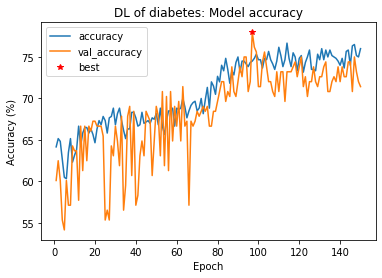

In [ ]:
epochs = 150

acc_list = [100 * i for i in hist.history['accuracy']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]
loss_list = hist.history['loss'] #[100 * i for i in history.history['loss']]
vloss_list = hist.history['val_loss'] #[100 * i for i in history.history['val_loss']]


plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*')
plt.title('DL of diabetes: Model accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy','best'], loc='best')

In [ ]:
# model performance
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.7143


[0.5724309086799622, 0.7142857313156128]

In [ ]:
y_train[:5],y_train.shape

(0    1
 1    0
 2    1
 3    0
 4    1
 Name: Outcome, dtype: int64, (600,))

In [ ]:
model.predict(X_train)[0:5],[int(np.round(prob)) for prob in model.predict(X_train)[0:5]]

(array([[0.4256827 ],
        [0.2363315 ],
        [0.80417717],
        [0.22246689],
        [0.6603561 ]], dtype=float32), [0, 0, 1, 0, 1])

In [ ]:
# the first data in trainset
X_train.iloc[0].tolist()

[6.0, 148.0, 72.0, 35.0, 125.0, 33.6, 0.627, 50.0]

In [ ]:
X_test.shape

(168, 8)

In [ ]:
y_test[:10].values

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [ ]:
X_test.iloc[0].values.tolist(),y_test.iloc[0]

([1.0, 108.0, 88.0, 19.0, 125.0, 27.1, 0.4, 24.0], 0)

In [ ]:
# make class predictions for test data with the model
predictions = [int(np.round(prob)) for prob in model.predict(X_test)]
predictions[:10]

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [ ]:
# summarize the first 10 cases in testset
for i in range(10):
   print('%s => %d (expected %d)' % (X_test.iloc[i].values.tolist(), predictions[i], y_test.iloc[i]))

[1.0, 108.0, 88.0, 19.0, 125.0, 27.1, 0.4, 24.0] => 0 (expected 0)
[6.0, 96.0, 72.0, 29.0, 125.0, 23.7, 0.19, 28.0] => 0 (expected 0)
[1.0, 124.0, 74.0, 36.0, 125.0, 27.8, 0.1, 30.0] => 0 (expected 0)
[7.0, 150.0, 78.0, 29.0, 126.0, 35.2, 0.6920000000000001, 54.0] => 0 (expected 1)
[4.0, 183.0, 72.0, 29.0, 125.0, 28.4, 0.212, 36.0] => 0 (expected 1)
[1.0, 124.0, 60.0, 32.0, 125.0, 35.8, 0.514, 21.0] => 0 (expected 0)
[1.0, 181.0, 78.0, 42.0, 293.0, 40.0, 1.258, 22.0] => 1 (expected 1)
[1.0, 92.0, 62.0, 25.0, 41.0, 19.5, 0.48200000000000004, 25.0] => 0 (expected 0)
[0.0, 152.0, 82.0, 39.0, 272.0, 41.5, 0.27, 27.0] => 0 (expected 0)
[1.0, 111.0, 62.0, 13.0, 182.0, 24.0, 0.138, 23.0] => 0 (expected 0)


### Confusion matrix

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, predictions)

In [ ]:
class_names = ['noDM','DM']

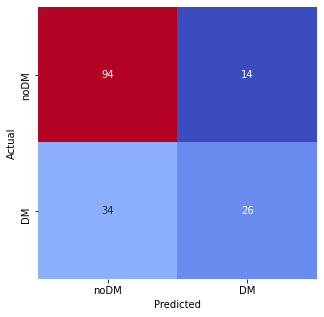

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, cbar=False, xticklabels=class_names, yticklabels=class_names, fmt='d', annot=True, cmap=plt.cm.coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## [DIY-1] Save the best model
- hdf5 file

In [ ]:
# define the keras model
model2 = Sequential([
    Dense(16, input_dim=8, activation='relu'),
    Dense(8, activation='relu'), 
    Dense(1, activation='sigmoid')                 
])
# compile the keras model
model2.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

### callbacks

In [ ]:
cp_callback = callbacks.ModelCheckpoint(filepath="./diabetes_DL_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=50)    # patience=10, 20, 50

In [ ]:
# fit the keras model on the dataset
hist = model2.fit(X_train, y_train, epochs=500, batch_size=10, verbose=1, 
                  callbacks=[cp_callback, es_callback], 
                  validation_data=(X_test, y_test))

Epoch 1/500
60/60 [==============================] - 0s 3ms/step - loss: 1.4607 - accuracy: 0.5000 - val_loss: 1.0623 - val_accuracy: 0.5476
Epoch 2/500
60/60 [==============================] - 0s 1ms/step - loss: 0.9836 - accuracy: 0.5417 - val_loss: 0.9457 - val_accuracy: 0.5060
Epoch 3/500
60/60 [==============================] - 0s 1ms/step - loss: 0.9035 - accuracy: 0.5550 - val_loss: 0.8388 - val_accuracy: 0.5238
Epoch 4/500
60/60 [==============================] - 0s 1ms/step - loss: 0.7855 - accuracy: 0.5983 - val_loss: 0.7772 - val_accuracy: 0.5595
Epoch 5/500
60/60 [==============================] - 0s 1ms/step - loss: 0.7272 - accuracy: 0.6017 - val_loss: 0.7589 - val_accuracy: 0.5833
Epoch 6/500
60/60 [==============================] - 0s 1ms/step - loss: 0.6828 - accuracy: 0.6467 - val_loss: 0.7237 - val_accuracy: 0.5893
Epoch 7/500
60/60 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.6433 - val_loss: 0.7176 - val_accuracy: 0.6012
Epoch 8/500
6

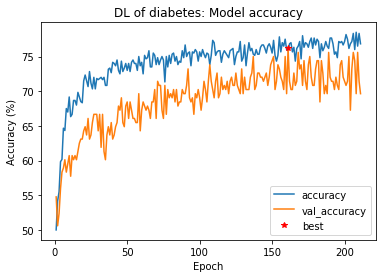

In [ ]:
epochs = 211

acc_list = [100 * i for i in hist.history['accuracy']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]
loss_list = hist.history['loss'] #[100 * i for i in history.history['loss']]
vloss_list = hist.history['val_loss'] #[100 * i for i in history.history['val_loss']]


plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*')
plt.title('DL of diabetes: Model accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy','best'], loc='best')

### best model
> diabetes_DL_best_weights.161-0.7619.hdf5

In [ ]:
# model2 performance
model2.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.5574 - accuracy: 0.6964


[0.5573704242706299, 0.6964285969734192]

In [ ]:
from keras.models import load_model

# model = load_model('your_best_model.hdf5')
model2_best = load_model('diabetes_DL_best_weights.161-0.7619.hdf5')
model2_best.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.5380 - accuracy: 0.7619


[0.5380279421806335, 0.761904776096344]

### Confusion matrix

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
predictions = [int(np.round(prob)) for prob in model2_best.predict(X_test)]

In [ ]:
cm = confusion_matrix(y_test, predictions)

In [ ]:
class_names = ['noDM','DM']

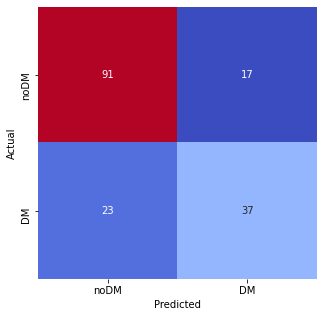

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, cbar=False, xticklabels=class_names, yticklabels=class_names, fmt='d', annot=True, cmap=plt.cm.coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

***

## [DIY-2] 데이터 전처리 후 딥러닝 모델 만들어서 평가

## Check data
- null
- NaN

In [ ]:
# Check NaN
data.isna().sum()
# data.isnull().sum()
# 이렇게 검사를 했을 때는 아무런 문제가 없는 다 0의 값이 나온다.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 과연 diabetes 데이터는 문제가 없는가?

- 각 항목에서 0이 허용되지 않는 경우에 0이 있다면 => 문제 있는 데이터!
- Pregnancies, Outcome은 0이 가능한 값이므로 제외하고 0이 있는 항목(column) 조사
- 0이 나오면 안되는 값들이 존재하기 때문에 data를 전처리를 해주어야 함

In [ ]:
data.head(10) # 0이 나오면 안되는 항목들이 0의 값을 가지고 있는 data들이 있음

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
# Pregnancies, Outcome은 0이 가능한 값이므로 제외하고 0이 있는 항목(column) 조사 (0을 가지면 안되는 항목들)
columns_with_zero = data.columns[(data==0).sum() > 0][1:-1]
columns_with_zero

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], dtype='object')

In [ ]:
# Clean the data : zero2median()
# 1. Check zeros in features with Pregnancies, Outcome excluded.
# 2. Replace zero with NaN 
# 3. Replace NaN with the median of the corresponding featurs
def zero2median(df):
    columns_with_zero = df.columns[(df==0).sum() > 0][1:-1]
    # Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], dtype='object')
    df[columns_with_zero]=df[columns_with_zero].replace(0,np.nan)
    for feature in columns_with_zero:
        df[feature].fillna(df[feature].median(),inplace=True) # 앞에서 NaN으로 바꾸어 주었는데 이를 또 중간값으로 바꿔줌

    return df

# Make clean dataframe, data2 from data
data2 = zero2median(data)

In [ ]:
data2.head(10)  # median() 함수로 중간값으로 바꿔준 후 head로 변경된 data2의 앞에 10개의 data들을 보여줌

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1


## [DIY] 전처리된 데이터프레임 data2를 이용해서 FCN으로 best model을 찾으시오.
- best model: hdf5 file
- Accuracy graph
- Confusion matrix graph

##**Find of data2 FCN best model**

In [ ]:
# Load the required packages 
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
%matplotlib inline

tf.random.set_seed(0)

print(tf.__version__)

2.3.0


In [ ]:
# Print the first 5 rows 
data2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# import TF2 submodules
from tensorflow.keras import layers, models, callbacks
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [120]:
# Split dataset to train & test set -> slicing으로 train, test data
X_train = data2.iloc[:600,0:8] # train data 600개
y_train = data2.iloc[:600,8]  # outcome은 class여서 제외, feature data만 추출
X_test = data2.iloc[600:,0:8]  # test data 168개
y_test = data2.iloc[600:,8]
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((600, 8), (600,), (168, 8), (168,))

In [121]:
# define the keras model
model3 = Sequential()
model3.add(Dense(12, input_dim=8, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='sigmoid')) # softmax
# compile the keras model
model3.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [122]:
# fit the keras model on the dataset
hist = model3.fit(X_train, y_train, epochs=150, batch_size=10, verbose=1, 
                 validation_data=(X_test, y_test))

Epoch 1/150
60/60 [==============================] - 0s 3ms/step - loss: 30.9780 - accuracy: 0.3467 - val_loss: 16.0297 - val_accuracy: 0.3571
Epoch 2/150
60/60 [==============================] - 0s 1ms/step - loss: 6.1192 - accuracy: 0.4483 - val_loss: 1.1882 - val_accuracy: 0.6548
Epoch 3/150
60/60 [==============================] - 0s 1ms/step - loss: 1.0335 - accuracy: 0.5800 - val_loss: 0.9286 - val_accuracy: 0.5238
Epoch 4/150
60/60 [==============================] - 0s 1ms/step - loss: 0.8788 - accuracy: 0.6017 - val_loss: 0.8658 - val_accuracy: 0.5119
Epoch 5/150
60/60 [==============================] - 0s 1ms/step - loss: 0.8233 - accuracy: 0.6050 - val_loss: 0.7982 - val_accuracy: 0.5714
Epoch 6/150
60/60 [==============================] - 0s 1ms/step - loss: 0.7860 - accuracy: 0.6067 - val_loss: 0.7715 - val_accuracy: 0.6012
Epoch 7/150
60/60 [==============================] - 0s 1ms/step - loss: 0.7619 - accuracy: 0.6117 - val_loss: 0.7361 - val_accuracy: 0.6012
Epoch 8/150

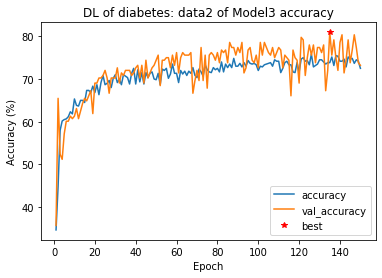

In [123]:
epochs = 150

acc_list = [100 * i for i in hist.history['accuracy']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]
loss_list = hist.history['loss'] #[100 * i for i in history.history['loss']]
vloss_list = hist.history['val_loss'] #[100 * i for i in history.history['val_loss']]

plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*')
plt.title('DL of diabetes: data2 of Model3 accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy','best'], loc='best')

In [124]:
# model performance -> 마지막 accuracy
model3.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.5226 - accuracy: 0.7321


[0.5225703120231628, 0.7321428656578064]

In [125]:
y_train[:5],y_train.shape

(0    1
 1    0
 2    1
 3    0
 4    1
 Name: Outcome, dtype: int64, (600,))

In [130]:
# 5명의 예측
model3.predict(X_train)[0:5],[int(np.round(prob)) for prob in model3.predict(X_train)[0:5]]

(array([[0.517084  ],
        [0.1001581 ],
        [0.67643404],
        [0.11337999],
        [0.7873576 ]], dtype=float32), [1, 0, 1, 0, 1])

In [129]:
# the first data in trainset
X_train.iloc[0].tolist()

[6.0, 148.0, 72.0, 35.0, 125.0, 33.6, 0.627, 50.0]

In [132]:
X_test.shape

(168, 8)

In [133]:
y_test[:10].values

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [134]:
X_test.iloc[0].values.tolist(),y_test.iloc[0]

([1.0, 108.0, 88.0, 19.0, 125.0, 27.1, 0.4, 24.0], 0)

In [135]:
# make class predictions for test data with the model
predictions = [int(np.round(prob)) for prob in model3.predict(X_test)]
predictions[:10]

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0]

In [136]:
# summarize the first 10 cases in testset
for i in range(10):
   print('%s => %d (expected %d)' % (X_test.iloc[i].values.tolist(), predictions[i], y_test.iloc[i]))

[1.0, 108.0, 88.0, 19.0, 125.0, 27.1, 0.4, 24.0] => 0 (expected 0)
[6.0, 96.0, 72.0, 29.0, 125.0, 23.7, 0.19, 28.0] => 0 (expected 0)
[1.0, 124.0, 74.0, 36.0, 125.0, 27.8, 0.1, 30.0] => 0 (expected 0)
[7.0, 150.0, 78.0, 29.0, 126.0, 35.2, 0.6920000000000001, 54.0] => 1 (expected 1)
[4.0, 183.0, 72.0, 29.0, 125.0, 28.4, 0.212, 36.0] => 1 (expected 1)
[1.0, 124.0, 60.0, 32.0, 125.0, 35.8, 0.514, 21.0] => 0 (expected 0)
[1.0, 181.0, 78.0, 42.0, 293.0, 40.0, 1.258, 22.0] => 0 (expected 1)
[1.0, 92.0, 62.0, 25.0, 41.0, 19.5, 0.48200000000000004, 25.0] => 0 (expected 0)
[0.0, 152.0, 82.0, 39.0, 272.0, 41.5, 0.27, 27.0] => 0 (expected 0)
[1.0, 111.0, 62.0, 13.0, 182.0, 24.0, 0.138, 23.0] => 0 (expected 0)


**Confusion matrix**

In [137]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [138]:
cm = confusion_matrix(y_test, predictions)

In [139]:
class_names = ['noDM','DM']

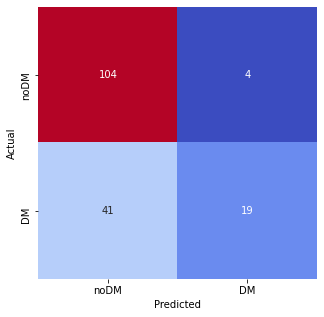

In [141]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, cbar=False, xticklabels=class_names, yticklabels=class_names, fmt='d', annot=True, cmap=plt.cm.coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##**Save the best model**
* hdf5 file

In [142]:
# define the keras model
model4 = Sequential([
    Dense(16, input_dim=8, activation='relu'),
    Dense(8, activation='relu'), 
    Dense(1, activation='sigmoid')                 
])
# compile the keras model
model4.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

**callbacks**

In [143]:
cp_callback = callbacks.ModelCheckpoint(filepath="./diabetes_DL_data2_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=50)    # patience=10, 20, 50

In [144]:
# fit the keras model on the dataset
hist = model4.fit(X_train, y_train, epochs=500, batch_size=10, verbose=1, 
                  callbacks=[cp_callback, es_callback], 
                  validation_data=(X_test, y_test))

Epoch 1/500
60/60 [==============================] - 0s 3ms/step - loss: 4.0882 - accuracy: 0.4700 - val_loss: 1.5585 - val_accuracy: 0.6012
Epoch 2/500
60/60 [==============================] - 0s 1ms/step - loss: 1.0102 - accuracy: 0.6367 - val_loss: 0.7748 - val_accuracy: 0.6071
Epoch 3/500
60/60 [==============================] - 0s 1ms/step - loss: 0.7441 - accuracy: 0.6583 - val_loss: 0.6746 - val_accuracy: 0.5952
Epoch 4/500
60/60 [==============================] - 0s 2ms/step - loss: 0.7215 - accuracy: 0.6617 - val_loss: 0.6333 - val_accuracy: 0.6250
Epoch 5/500
60/60 [==============================] - 0s 1ms/step - loss: 0.6740 - accuracy: 0.6750 - val_loss: 0.6356 - val_accuracy: 0.6488
Epoch 6/500
60/60 [==============================] - 0s 1ms/step - loss: 0.6651 - accuracy: 0.6983 - val_loss: 0.6443 - val_accuracy: 0.6429
Epoch 7/500
60/60 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.6767 - val_loss: 0.6927 - val_accuracy: 0.6131
Epoch 8/500
6

**Accuracy graph**

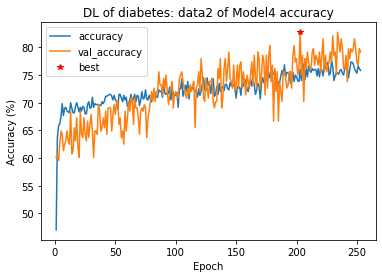

In [149]:
epochs = 253

acc_list = [100 * i for i in hist.history['accuracy']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]
loss_list = hist.history['loss'] #[100 * i for i in history.history['loss']]
vloss_list = hist.history['val_loss'] #[100 * i for i in history.history['val_loss']]

plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*')
plt.title('DL of diabetes: data2 of Model4 accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy','best'], loc='best')

**Best model**
- diabetes_DL_data2_best_weights.203-0.8274.hdf5

In [150]:
# model2 performance
model4.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.5077 - accuracy: 0.7917


[0.5076934695243835, 0.7916666865348816]

In [151]:
from keras.models import load_model

# model = load_model('your_best_model.hdf5')
model4_best = load_model('diabetes_DL_data2_best_weights.203-0.8274.hdf5')
model4_best.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.5237 - accuracy: 0.8274


[0.5237209796905518, 0.8273809552192688]

**Confusion matrix**

In [152]:
predictions = [int(np.round(prob)) for prob in model4_best.predict(X_test)]

In [153]:
cm = confusion_matrix(y_test, predictions)

In [155]:
class_names = ['noDM','DM']

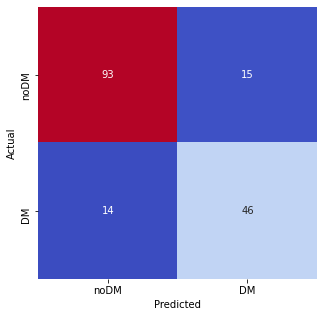

In [156]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, cbar=False, xticklabels=class_names, yticklabels=class_names, fmt='d', annot=True, cmap=plt.cm.coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()